# Diagnosticos en ML y seleccion de modelos.

[mis clases en GitHub](https://github.com/hjaramil/Classes-at-UdeM)

Como ya hemos discutido en clase, se necesitan por lo menos dos conjuntos de datos (uno de entenamiento, otro de prueba).
Muchas veces se recomiendan 3. El del medio seria "cross-validation" y sirve para ajustar mejor el modelo.

Es decir

1. Datos de entrenamiento: Aca se pueden explorar los posibles parametros $\theta$ que ajusten el modelo.

2. Datos de validacion: Se usan para un mejor ajuste de los parametros del modelo con el fin de evitar "overfitting".

3. Datos de prueba. Luego de ajustar los parametros, debemos estar seguros que el modelo esta listo para "deployment".
Con esto debemos ver que el modelo "generaliza". Es decir que funciona para datos por fuera de los que se usaron en el entrenamiento.  

**Ejemplo 3.3.7**: Suponga que quiere hacer una regresion lineal, polinomica, pero no sabemos el orden optimo del polinomio. Usaremos hasta polinomios de grado 6.

$$h_1(\theta, x) = \theta_0 + \theta_1 x $$
$$h_2(\theta, x) = \theta_0 + \theta_1 x + \theta_2 x^2$$
$$ \vdots $$
$$h_6(\theta, x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_6 x^6$$

Debemos entonces definir las funciones de costo para cada uno de estos polinomios, con regularizacion e implementarlas en los tres conjuntos de arriba

$$J_{\text{train}} = \frac{1}{2 m_{\text{train}}}
\left [
    \sum_{i=1}^{m_{\text{train}}} (h_k(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{\text{train}}} \theta_i^2
    \right ] $$

$$J_{\text{cv}} = \frac{1}{2 m_{\text{cv}}}
\left [
    \sum_{i=1}^{m_{\text{cv}}} (h_k(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{\text{cv}}} \theta_i^2
    \right ] $$

$$J_{\text{test}} = \frac{1}{2 m_{\text{test}}}
\left [
    \sum_{i=1}^{m_{\text{test}}} (h_k(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{\text{test}}} \theta_i^2
    \right ] $$

El $\theta$ (amarrado al grado del polinomio) que mejor se ajuste debe tener dos caracteristicas importantes.

1. Mejor precision
2. No halla overfitting (sobreajuste).


Antes hemos mencionado el $k-fold$ cross-validation. Que se parte el conjunto en $k$ subconjuntos y se usa $k-1$ de ellos para entrenar y el otro para probar.

## Bias Vs Variance (sesgo versus varianza).
Estos conceptos son de suma importancia para validar modelos.


Cualitativamente

**Bias**: Es el error debido al comportamiento general del modelo. Como se ajusta, de forma global el modelo a los datos.
El "sesgo" es un promedio.

**Variance**: La varianza es causada por un esfuerzo de ajustar muy bien los datos. Al punto de que este ajuste puede seguir el ruido muy de cerca y crear "overfitting" (sobreajuste).

Ahora vamos ser mas **cuantitativos**.

Recordemos la funcion de costo para la regresion lineal.

\begin{eqnarray}
J(\theta) = \frac{1}{2m}
\left [
    \sum_{j=1}^m ( h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^n \theta_i^2
\right ]
\end{eqnarray}

Consideremos un conjunto de datos con muestras $x_1, x_2, \cdots, x_m$ con etiquetas $y_1, y_2, \cdots, y_m$.
Ese modelo se puede formular en abstracto

$$y = f(x) + \epsilon $$
donde $\epsilon$ es la componente de ruido.

Vamos a usar un poco de estadistica.
El **mean squared error** se define mediante la ecuacion

$$\mathbb{E}[ (y - h(x))^2]  = \sum_{i=1}^m (y_i - h(x_i))^2 p(x_i) $$
Si la probabilidad es uniforme, es decir $p=1/m$, entonces esta funcion, coincidencialmente es la funcion de costo (ignore la regularizacion y el factor $1/2$)
Note que escribimos $h(x)$ en vez de $h(\theta, x)$.

La definicion de bias y variance cuantitativamente es
asumiendo $\epsilon=0$.

$$\text{Bias}[ h(x)] = \mathbb{E}[ h(x)] - \mathbb{E}[f(x)]$$
$$\text{Var}[h(x)] = \mathbb{E}[h^2(x)] - \mathbb{E}^2[h(x)] $$


Existe una relacion entre varianza , el sesgo y el MSE que vamos a explorar.

\begin{eqnarray}
\mathbb{E}[(y - h(x))^2] &=& \mathbb{E}[ y^2 - 2 y h(x) + h^2(x)] = y^2 - 2 y \mathbb{E}[h(x)] + \mathbb{E}[h^2(x)]  (MSE) \\
\text{Bias}^2[h(x)] &=& ( \mathbb{E}[h(x)] - \mathbb{E}(f(x))^2 \\
&=& \mathbb{E}^2[h(x)] - 2 \mathbb{E}[h(x)] \mathbb{E}[f(x)] + \mathbb{E}^2 [ f(x) ]  \\
&=& \mathbb{E}^2 [ h(x) ] - 2 y \mathbb{E}[h(x)] + y^2 \\
\text{Var}[h(x)] &=& \mathbb{E}[h^2(x)] - \mathbb{E}^2[h(x)]
\end{eqnarray}

Escribimos de nuevo el MSE con un truco (sumar y restar una cantidad)

$$\mathbb{E}[ ( y - h(x))^2] = y^2 - 2 y \mathbb{E}[h(x)] + \mathbb{E}^2 [ h(x) ] + \mathbb{E}[h^2(x)] - \mathbb{E}^2[ h(x) ]  $$


Lo que estamos diciendo es que

$$MSE = \text{Bias}^2 + \text{Var} $$

O de otra forma


$$\mathbb{E}[ (y - h(x))^2] = \text{Bias}^2 [ h(x)] + \text{Var} [ h(x) ]  $$

Vamos a ver una grafica que tome de la intenet (StackExchange, StackOverflow)

La grafica 3.76 se llama el "bulls-eye" ilustra comparaciones de Bias vs Variance.

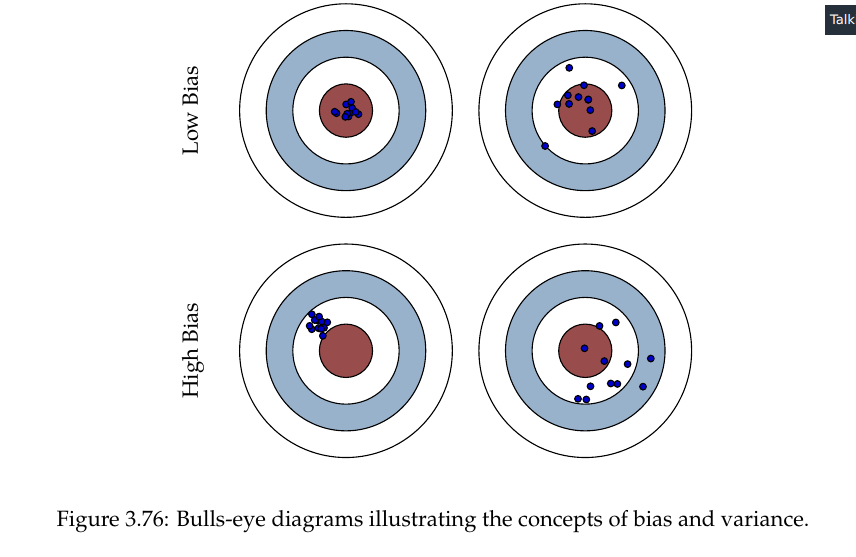

La Figura 3.77 muestra tres casos de el ajuste de una curva a un conjunto de puntos (tambien de StackExchange)

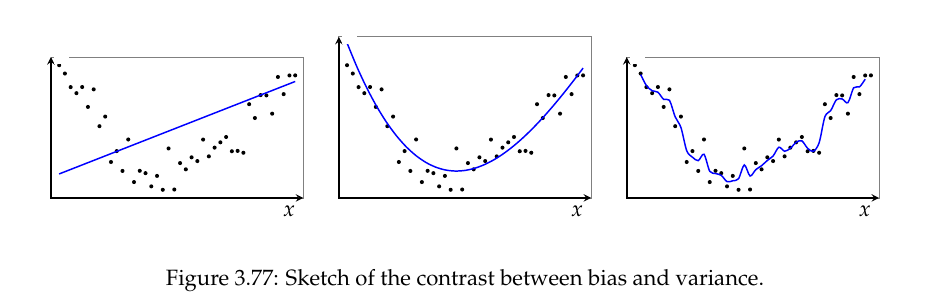

En el marco de la izquierda tenemos un sesgo grande. Se aleja mucho de la solucion. El del centro se ajusta mucho mejor y la curva de ajuste es muy suave. El de la derecha se ajusta superbien a los puntos. Aca vemos una osilaciones de alta frecuencia. Estas podrian seguir el ruido con mucho detalle.
Esto implica una varianza grande.  Y  podemos pensar que estas
tres curvas representan (de izquierda a derecha), subajuste, ajuste y sobreajuste (overfitting).



La Figura 3.78 muestra la relacion entre MSN, Bias$^2$ y el Var.


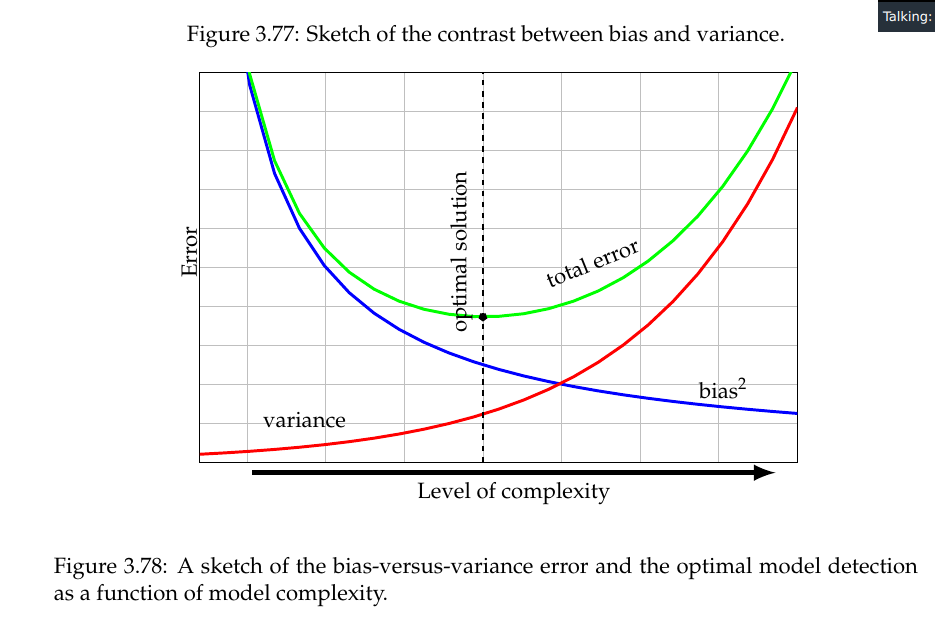

## Learning Curves (curvas de aprendizaje)
La grafica 3.79 ilustra dos figuras

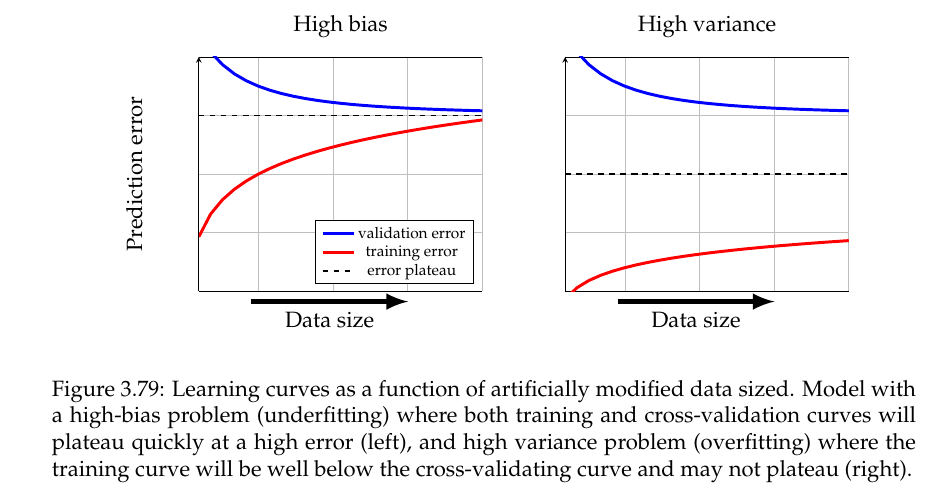

High bias es un sintoma de underfitting.
High Variance es un sintoma de overfitting.

* Para aliviar problemas de "high variance" (overfitting)
    * Incrementar mas muestras (mas datos)
    * reducir los parametros (features). Por ejemplo en ANN hacer la red mas pequenha (menos nodos, menos capas).
    * Incrementar el parametro de regularizacion $\lambda$.

* Para aliviar problemas de "high bias" (underfitting)
    * Menos datos
    * incrementar los parametros (la complejidad)
    * Disminuir el valor del parametro de regularizacion $\lambda$.

    


# Support Vector Machines (SVM): Maquinas de soporte vectorial.
Es un metodo muy eficiente para clasificacion y otras funciones.
## Historia y Motivacion
En los 1960s Vladimir Vapnik (creo que fue su tesis de doctorado) desarrollo el metodo de SVM (que veremos en esta clase). Sin embargo este metodo no fue conocido hasta muchos anhos despues. Vapnik inmigro a los estados unidos en 1992 para trabajar con los laboratorios Bell. Vapnik sometio tres articulos a la revista
[Conference on Neural Information Processing Systems](https://neurips.cc/). Los tres fueron rechazados.  Ya fue por alla mas adelante donde Isabel Guyon invento el "kernel trick" que el metodo cogio mayor popularidad.
Ademas hay una historia interesante. Vapnik aposto tomando cafe con un caompanhero que el SVN era mas eficiente que las redes neuronales en la solucion de reconozer digitos escritos a mano (como MNIST). Vapnik gano la apuesta.

El SVM es muy eficiente al clasificar entre dos categorias (se puede ampliar a mas categorias con el one-vs-all algoritmo). La idea, que la vamos a cuantificar con detalle, es separar las dos categorias que viven en un espacio de $n$ dimensiones por un hiperplano de $n-1$ dimensiones.

Vamos a empezar a cuantificar el problema , poco a poco.

Inicialmente comparamos SVM con lo que vimos en regresion lineal.

En regresion lineal, debiamos encontrar una recta de intercepto $b$ y pendiente $a$ en el plano $\mathbb{R}^2$. Para esto la recta es $y= ax + b$, pero debemos ajustar puntos $(x_i, y_i)$, con $i=1,2, \cdots , m$. La funcion de costo es

$$J(a,b) = \frac{1}{2m} \sum_{i=1}^m [ y_i -(ax_i + b)^2]  $$

En SVM existe algo parecido, pero la idea es que si se tienen dos nubes de puntos, linealmente separables, se puede crear una magen (gap) entre las dos nubes tan grande como sea posible.

Pensemos de nuevo en el problema de regresion lineal y en una linea $y=ax+b$ que es la linea del centro de la "carretara", el problema llama una funcion de costo que quiera **maximizar el gap**. En este caso la ecuacion de la funcion de costo tiene similaridades, pero las distancias son ortogonales, no verticales.

La ecuacion para esto es

$$J(a,b) = \frac{1}{2m} \sum_{i=1}^m d^2[ (x_i, y_i), L(a,b)] $$


# Aplicaciones: Leer las notas de clase.
Caulquier problema que implique clasificacion se puede resolver con SVM.

Nos comenzamos a meter un poco mas en la matematica.

## Los hiperplanos de SVM y los vectores de soporte.

Existe un software VanderPlas (referencia en las notas de clase) de uso libre pero con permiso del MIT.

Las siguientes Figuras se generaon con ese software.

Se toman 50 puntos, rojos y amarillos, que son linealmente separables.



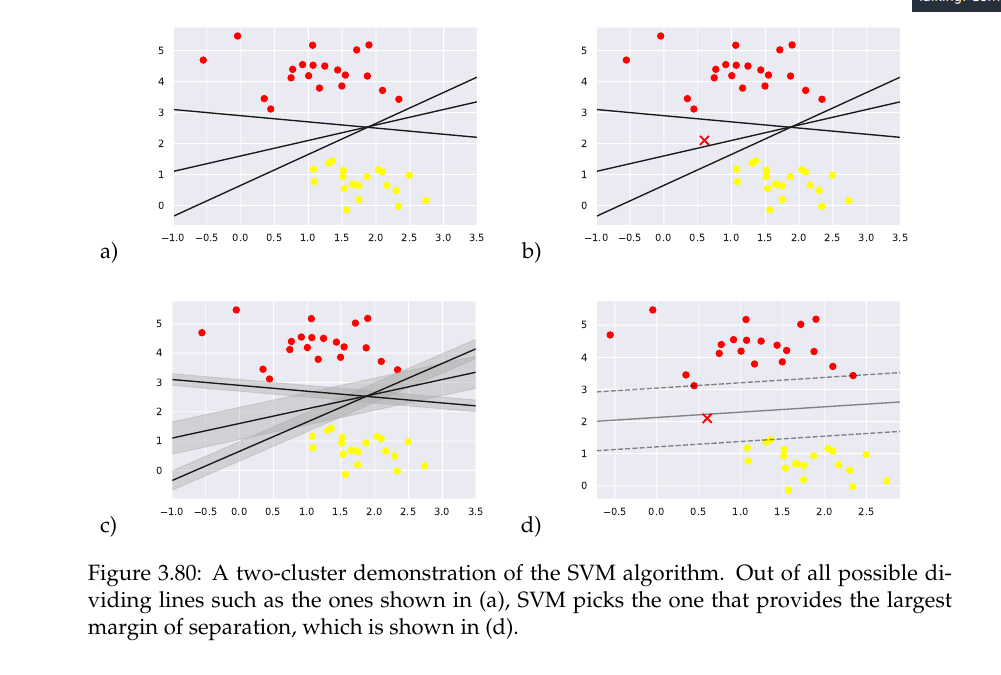

La siguiente grafica ilustra el hecho de que se puedan agregar muchos puntos sin cambiar el hiperplano de referencia y los vectores de soporte.

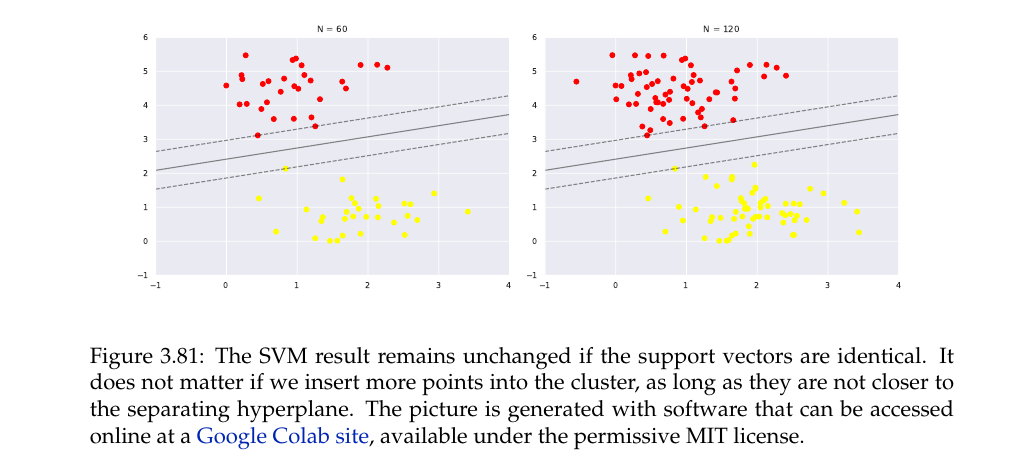

## Funcion de costo para el SVM.
Debemos asumir que tenemos un conjunto de puntos $x^{(1)}, x^{(2)}, \cdots x^{(m)}$. Que son linelamente separables. Por ejemplo en $\mathbb{R}^2$.
$$(x_1, x_2)^{(1)}, (x_1, x_2)^{(2)}, \cdots, (x_1, x_2)^{(m)} $$
 Estos puntos tienen etiquetas (estamos todavia en ML supervisado). Las etiquetas son $y^{(i)}$ pero estas solo tienen dos categorias $\oplus=1$, $\ominus=-1$. Veamos la siguiente grafica.

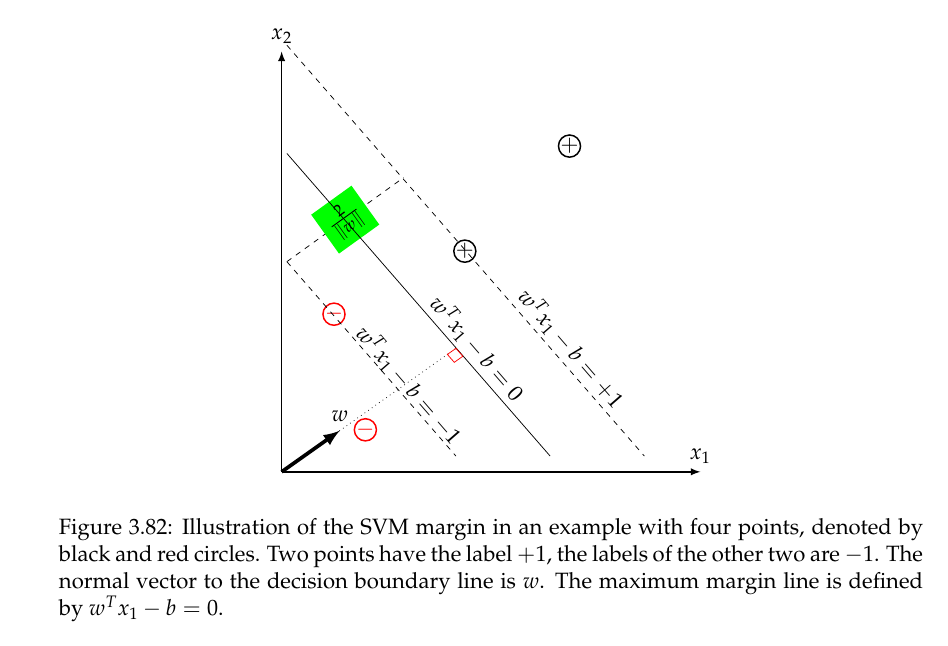

Supongamos que la linea es en $\mathbb{R}$, puntos $(x_1^{(i)}, x_2^{(i)})$, $i=1,2, \cdots, m$

$$x_2 = a x_1 - b $$
(normalmente decimos $+b$ y no $-b$ pero eso no es problema.

Esto es

$$ 0 = a x_1 - x_2 - b $$
Se puede escribir matricialmente como


$$0 = \binom{a}{-1}^T \binom{x_1}{x_2} - b $$

Esto se puede generalizar a $\mathbb{R}^n$ como

$$0 = w^T x - b $$

Ahora podemos definir una "gap" $\delta$ de forma que ese hiperplano lo podemos deplazar la cantida $\delta$, matematicamente esto se logra con

$$\delta = w^T x - b $$

Las idea es que puntos a un lado (distancia positiva) de la linea $w^T x = b$ son $\oplus$ (los de arriba, negros), es decir


$$w^T x^{(i)} - b \ge 0  \quad, \quad \text{si } y^{(i)} = 1 $$
puntos al otro lado de la linea son $\ominus$, los de abajo (rojos).

$$w^T x^{(i)} - b < 0  \quad, \quad \text{si } y^{(i)} = -1 $$

La frontera (eje, hiperplano de separacion) esta dada por
$w^T x = b$, o $w^T x - b = 0$.

Si un punto $x^{(i)}$ esta a una distancia por encima $\delta$ del hiperplano central

$$w^T x^{(i)} - b = \delta  \quad , \quad \text{si } y^{(i)} = 1 \tag{1} $$


Si un punto $x^{(i)}$ esta a una distancia por debajo $-\delta$ del hiperplano central


$$w^T x^{(i)} - b = -\delta  \quad , \quad \text{si } y^{(i)} = -1 \tag{2} $$

Las ecuaciones (1) y (2) las podemos escribir en una sola

$$y^{(i)} ( w^T x^{(i)} - b) = \delta. \tag{3} $$

El margen entre dos puntos equidistantes del hiperplano central,
esta dado por

$$\frac{2 \delta}{ \| w \|}.  \tag{4} $$

Ver problema 13 en la lista de ejercicios del capitulo de Algebra Lineal.

La Ecuacion (3) la voy a reescribir como

$$y^{(i)} ( w^T x^{(i)} - b) = 1 \tag{5} $$
donde en vez de $\delta$ use 1. Por que esto es valido?

Yo puedo dividr la eucion (3) por $\delta$

$$y^{(i)} \bigg ( \frac{w}{\delta}^T x^{(i)} - \frac{b}{\delta} \bigg ) = 1$$

Yo puedo redefinir mis variables $w \leftarrow w/\delta$, $b \leftarrow b/\delta$.

Volviendo a la Ecuacion (4), queremos maximizar el "gap", pero con $\delta=1$. Pero estamos acostumbrados a minimzar y tambien a cuadrados, por que las normas son raices cuadradas y no queremos trabajar con raices cuadradas. Ademas el maximo de una funcion ocurre donde ocurre el maximo de la raiz cuadrada.  

De esta forma llegamos a la siguiente funcion objetivo.

$$\min \frac{\| w \|^2}{2} \quad, \quad \text{sugeto a la restriccion }  y^{(i)} ( w^T x^{(i)} - b) \ge 1 \tag{6}$$
Note que generalizamos un poco sobre la Ecuacion (5).
te


Esta es la funcion de costo **sin regularizacion**.
Observe la siguiente Figura

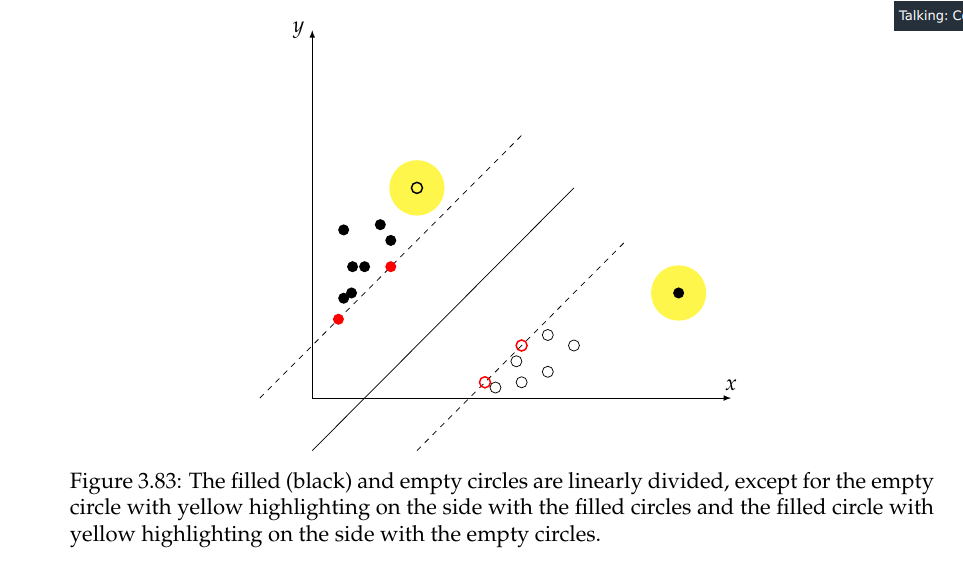

El punto negro esta junto los circulos vacios (no deberia). Es un "outlier". Para esto necesitamos regularization. Como esta el conjunto no es linealmente separable. Entonces tenemos que regularizar para aceptar compromisos.

La funcion de costo con regularizacion es

$$J(w) = \frac{\| w \|^2}{2} + C \sum_{i=1}^m (1 - y^{(i)} [ w^T x^{(i)} - b ] ) $$

$C>0$ y debemos minimizar $J(w)$. Ahora si el punto esta bien localizado tenemos de la Ecuacion (6)

$$  y^{(i)} ( w^T x^{(i)} - b) \ge 1 $$
$$  1 - y^{(i)} ( w^T x^{(i)} - b) \le 0 $$
Los puntos bien ubicados contribuyen a la suma con valores negativos (eso es bueno) y los puntos mal ubicados contribuyen a la suma con valores positivos (penalizan, por que $C>0$).

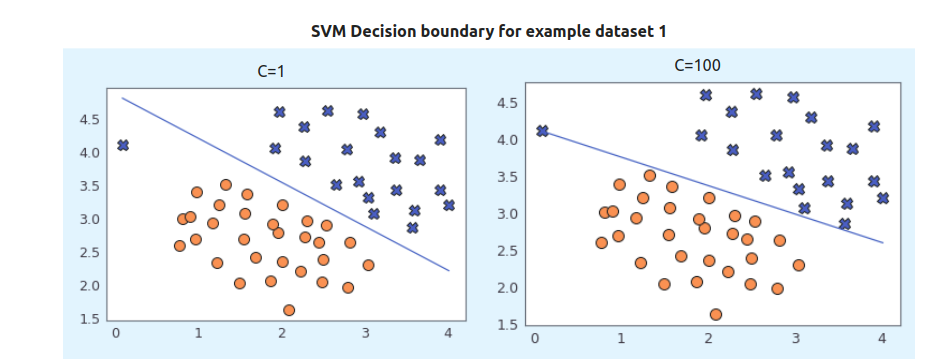

La grafica de arriba, que va a generar en la tarea correspondiente a SVM muestra el efecto de la constante $C$.